In [ ]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


In [ ]:
#descargamos los datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#indice de palabras 
word_index = imdb.get_word_index()
#lo transformamos en un diccionario
word_index = dict([(value,key) for (key,value) in word_index.items()])

#mostramos los datos
#for todas variables en train data que me imprima todo el index cuando get todo -3, porque los primeros 3 indices son palabras reservadas
for _ in train_data[0]:
    print(word_index.get( _ - 3))

1654784/1641221 [==============================] - 0s 0us/step
None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
th

In [ ]:
def vectorizar(sequences, dim=10000): 
    #sequences es el set de datos, dim es el tamaño del set
    #guardamos los resultados en un array de ceros
    restults = np.zeros((len(sequences),dim))

    #iteramos la sequencia y siempre que la palabra "coincida"(el profe noe xplico una mierda), en results ponemos un 1
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults    

In [ ]:
#transformamos listas en tensores
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
#transformamos los datos a float 32 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
#creamos modelo
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [17]:
#Data de validacion para loss function
#los primeros 1000 registros
x_val = x_train[:10000]
#los ultimos 1000 registros
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

#ENTRENAMOS
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=14,  # iteraciones
                   batch_size=512, #lotes de datos
                   validation_data=(x_val,y_val)) #data de validacion




Epoch 1/14
30/30 [==============================] - 3s 109ms/step - loss: 0.1520 - acc: 0.9522 - val_loss: 0.2774 - val_acc: 0.8880
Epoch 2/14
30/30 [==============================] - 1s 43ms/step - loss: 0.1232 - acc: 0.9629 - val_loss: 0.3015 - val_acc: 0.8837
Epoch 3/14
30/30 [==============================] - 1s 42ms/step - loss: 0.1026 - acc: 0.9685 - val_loss: 0.2999 - val_acc: 0.8839
Epoch 4/14
30/30 [==============================] - 1s 44ms/step - loss: 0.0843 - acc: 0.9756 - val_loss: 0.3197 - val_acc: 0.8805
Epoch 5/14
30/30 [==============================] - 1s 48ms/step - loss: 0.0708 - acc: 0.9805 - val_loss: 0.3403 - val_acc: 0.8815
Epoch 6/14
30/30 [==============================] - 1s 45ms/step - loss: 0.0563 - acc: 0.9863 - val_loss: 0.4055 - val_acc: 0.8672
Epoch 7/14
30/30 [==============================] - 1s 45ms/step - loss: 0.0474 - acc: 0.9881 - val_loss: 0.3875 - val_acc: 0.8765
Epoch 8/14
30/30 [==============================] - 1s 42ms/step - loss: 0.0357 - 

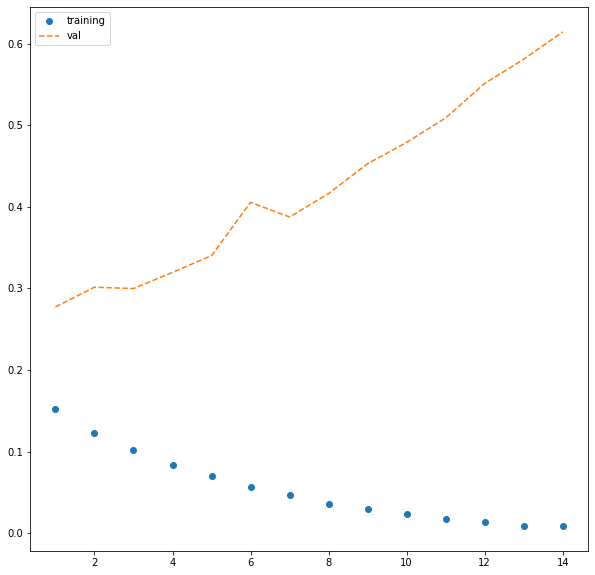

In [18]:
import matplotlib.pyplot as plt 

#muestra el rendmiento de cada epoch
history_dict = history.history 
#valores de perdida 
loss_values = history_dict['loss']
#valores perdida validacion
val_loss_values = history_dict['val_loss']


fig = plt.figure(figsize=(10,10))
#epocas rango 1 y la logitud de loss value +1
epoch = range(1,len(loss_values)+1)
#graficamos y axis values 
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [22]:
from keras import regularizers
#Regularizacion
#creamos modelo
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001)))#un regularizador con un lambda de 0.001
model2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

#ENTRENAMOS
history = model2.fit(partial_x_train, 
                   partial_y_train,
                   epochs=14,  # iteraciones
                   batch_size=512, #lotes de datos
                   validation_data=(x_val,y_val)) #data de validacion


Epoch 1/14
30/30 [==============================] - 3s 64ms/step - loss: 0.6282 - acc: 0.6651 - val_loss: 0.5438 - val_acc: 0.8022
Epoch 2/14
30/30 [==============================] - 1s 49ms/step - loss: 0.4689 - acc: 0.8695 - val_loss: 0.4402 - val_acc: 0.8577
Epoch 3/14
30/30 [==============================] - 1s 49ms/step - loss: 0.3633 - acc: 0.9137 - val_loss: 0.3770 - val_acc: 0.8822
Epoch 4/14
30/30 [==============================] - 2s 51ms/step - loss: 0.2993 - acc: 0.9291 - val_loss: 0.3433 - val_acc: 0.8872
Epoch 5/14
30/30 [==============================] - 1s 49ms/step - loss: 0.2638 - acc: 0.9355 - val_loss: 0.3564 - val_acc: 0.8766
Epoch 6/14
30/30 [==============================] - 1s 48ms/step - loss: 0.2384 - acc: 0.9418 - val_loss: 0.3330 - val_acc: 0.8855
Epoch 7/14
30/30 [==============================] - 1s 49ms/step - loss: 0.2199 - acc: 0.9501 - val_loss: 0.3460 - val_acc: 0.8797
Epoch 8/14
30/30 [==============================] - 1s 49ms/step - loss: 0.2086 - a

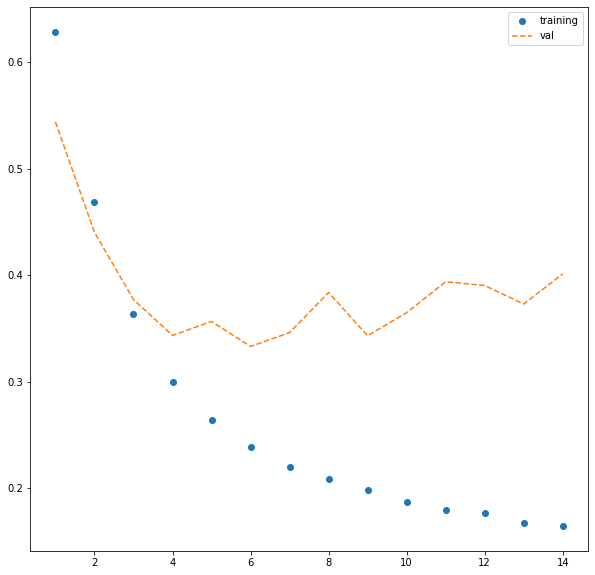

In [23]:
#muestra el rendmiento de cada epoch
history_dict = history.history 
#valores de perdida 
loss_values = history_dict['loss']
#valores perdida validacion
val_loss_values = history_dict['val_loss']


fig = plt.figure(figsize=(10,10))
#epocas rango 1 y la logitud de loss value +1
epoch = range(1,len(loss_values)+1)
#graficamos y axis values 
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [24]:
#DROPOUT
#creamos modelo
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))#un regularizador con un lambda de 0.001
model3.add(layers.Dropout(0.5)) #el dropout se añade como capa, en este caso apaga la mitad de las neuronas en cada iteracion
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

#ENTRENAMOS
history = model3.fit(partial_x_train, 
                   partial_y_train,
                   epochs=14,  # iteraciones
                   batch_size=512, #lotes de datos
                   validation_data=(x_val,y_val)) #data de validacion

Epoch 1/14
30/30 [==============================] - 3s 70ms/step - loss: 0.5964 - acc: 0.6942 - val_loss: 0.4602 - val_acc: 0.8414
Epoch 2/14
30/30 [==============================] - 1s 46ms/step - loss: 0.4339 - acc: 0.8302 - val_loss: 0.3589 - val_acc: 0.8758
Epoch 3/14
30/30 [==============================] - 1s 46ms/step - loss: 0.3451 - acc: 0.8748 - val_loss: 0.3086 - val_acc: 0.8836
Epoch 4/14
30/30 [==============================] - 1s 44ms/step - loss: 0.2783 - acc: 0.9027 - val_loss: 0.2850 - val_acc: 0.8885
Epoch 5/14
30/30 [==============================] - 1s 43ms/step - loss: 0.2363 - acc: 0.9178 - val_loss: 0.2851 - val_acc: 0.8891
Epoch 6/14
30/30 [==============================] - 1s 40ms/step - loss: 0.2053 - acc: 0.9299 - val_loss: 0.2788 - val_acc: 0.8858
Epoch 7/14
30/30 [==============================] - 1s 45ms/step - loss: 0.1768 - acc: 0.9420 - val_loss: 0.2873 - val_acc: 0.8883
Epoch 8/14
30/30 [==============================] - 1s 44ms/step - loss: 0.1514 - a

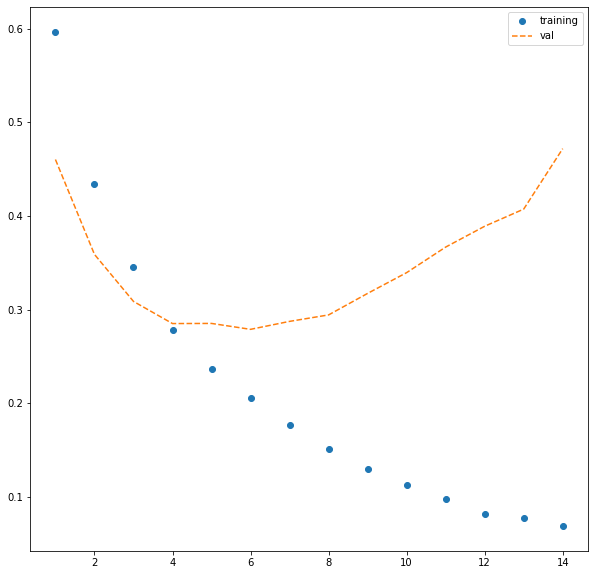

In [25]:
#muestra el rendmiento de cada epoch
history_dict = history.history 
#valores de perdida 
loss_values = history_dict['loss']
#valores perdida validacion
val_loss_values = history_dict['val_loss']


fig = plt.figure(figsize=(10,10))
#epocas rango 1 y la logitud de loss value +1
epoch = range(1,len(loss_values)+1)
#graficamos y axis values 
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()